# Customer Churn Prediction Model for Telecom Customer Dataset

##### At glance:
      I have used logistic regression model for this binary classification problem which I tried to fine tune by setting the 
      hyperparameter and performing Grid Search to fine best params
    

In [354]:
# Importing Primary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df= pd.read_csv('Telecom_Train.csv')

In [356]:
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


---

# EDA

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3333 non-null   int64  
 1   state                          3333 non-null   object 
 2   account_length                 3333 non-null   int64  
 3   area_code                      3333 non-null   object 
 4   international_plan             3333 non-null   object 
 5   voice_mail_plan                3333 non-null   object 
 6   number_vmail_messages          3333 non-null   int64  
 7   total_day_minutes              3333 non-null   float64
 8   total_day_calls                3333 non-null   int64  
 9   total_day_charge               3333 non-null   float64
 10  total_eve_minutes              3333 non-null   float64
 11  total_eve_calls                3333 non-null   int64  
 12  total_eve_charge               3333 non-null   f

In [358]:
df =df.drop('Unnamed: 0', axis=1)

(array([2850.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         483.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

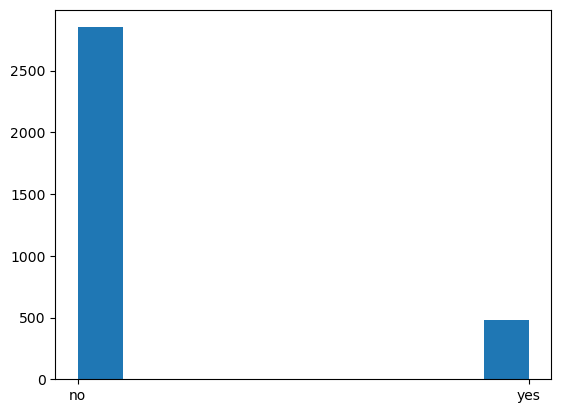

In [360]:
#making histogram of  churn
plt.hist(x = df['churn'])
# churn means to loose
#most churn are NO indicating most customer won't cancel their services

In [361]:
print(df['churn'].value_counts())
# So, data is imbalanced.

no     2850
yes     483
Name: churn, dtype: int64


In [362]:
df['area_code'].value_counts()
# so only three types of area

area_code_415    1655
area_code_510     840
area_code_408     838
Name: area_code, dtype: int64

In [363]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

(array([3010.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

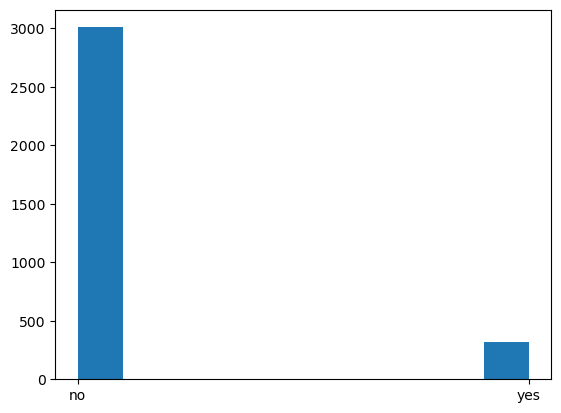

In [364]:
plt.hist(x = df['international_plan'])
# So very few with international plan

(array([ 922.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2411.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

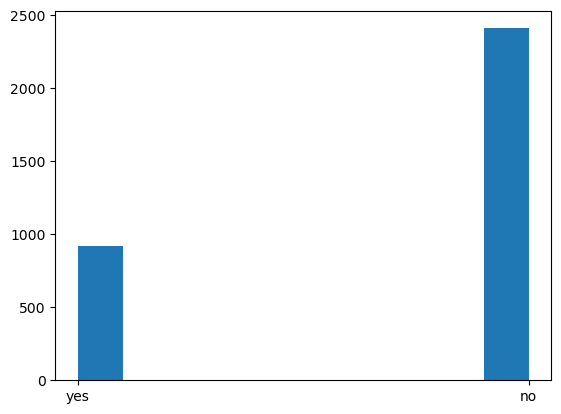

In [365]:
plt.hist(x = df['voice_mail_plan'])
# Interseting, so less than half use voice mail plan.
# IF you dont have voicemail plan, no. of vmail msgs becomes zero for you.

<AxesSubplot:xlabel='number_customer_service_calls', ylabel='Count'>

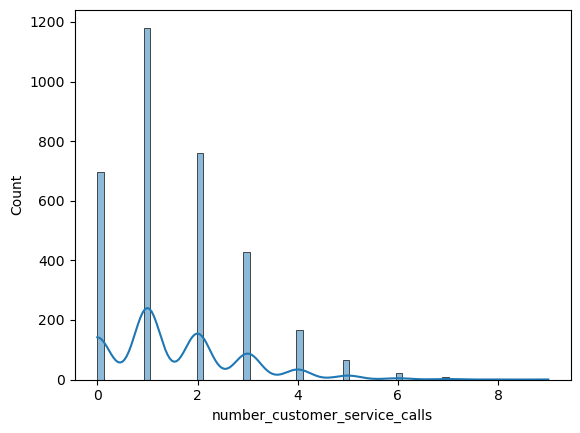

In [366]:
# plt.hist(x = df['number_customer_service_calls'],KDE=True)
sns.histplot(data=df['number_customer_service_calls'], kde=True)

In [367]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [368]:
# Encoding for categorical variables

# converting churn
# df['churn_val']= lambda(0 if x=='no' else 1  for x in df['churn'])
df['churn']= [0 if x=='no' else 1 for x in df['churn']]
df['international_plan']= [0 if x=='no' else 1 for x in df['international_plan']]
df['voice_mail_plan']= [0 if x=='no' else 1 for x in df['voice_mail_plan']]
# dont run it again in between, it can change values

1. Most obvious thing we notice is how time and charge are related.
2. so que arises if we need to keep both columns. Does keeping both columns causes any harm
3. Does reducing the no. of columns in our data set improves performance of model

In [370]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [371]:
# since customer are more driven by cost, we will drop the time columns
todrop= ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
newdf= df.drop(columns=todrop)

In [372]:
newdf.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,area_code_415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,area_code_415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,area_code_408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,area_code_415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [373]:
# hot encode area_code
df = pd.get_dummies(df, columns=['area_code'], drop_first=True)


In [374]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


<AxesSubplot:>

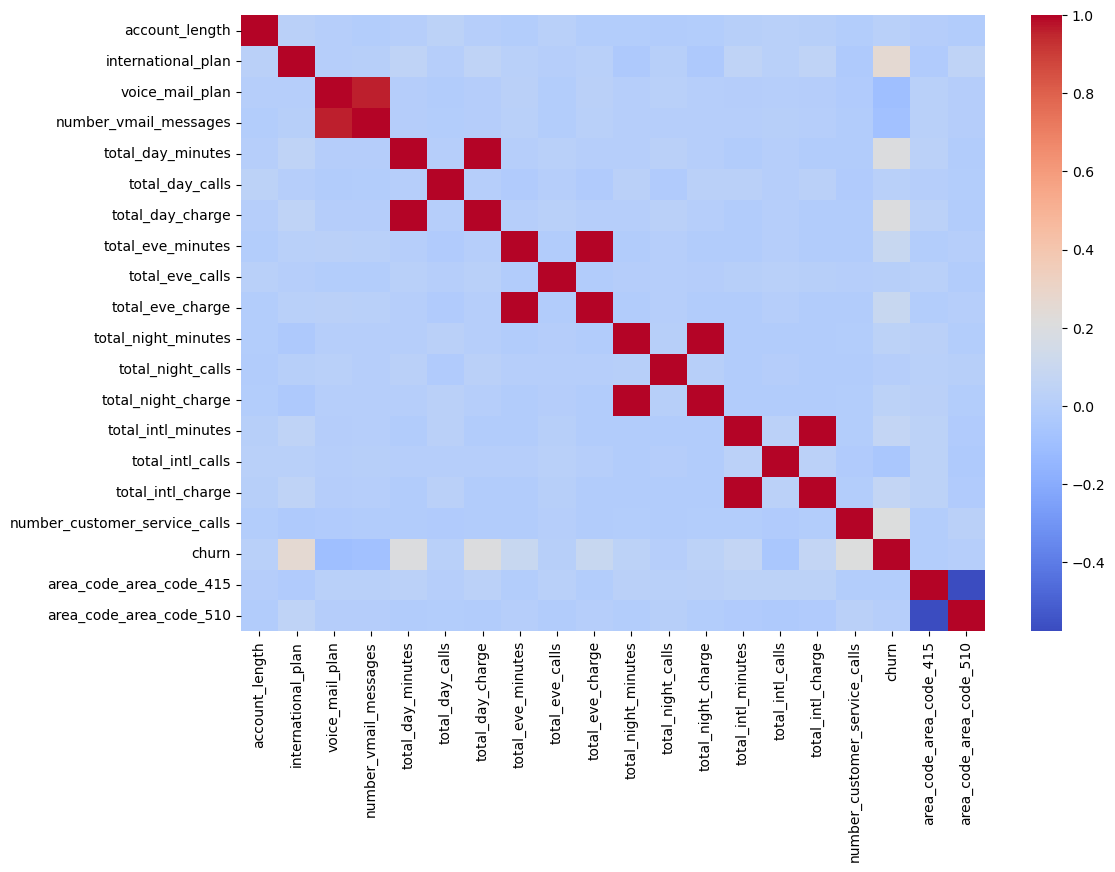

In [375]:
#Creating a heatmap of corr
corrplt= df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrplt,annot=False,cmap='coolwarm')
# notice bydefault its take only numeric values to compare and plot
#Problem - there is no churn , how to see what affects it more

---

# Modeling


In [376]:
# A binart classification model. We will use logistic regression for it
# lets do the regression now
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [377]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [378]:
# i split the data but the dataset itself is imbalanced. 
# To counter this we have two methods : upsampling and downsampling
# we will go with upsampling of minortiy dataset here

In [379]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [380]:
churn_majo= df[df['churn']==0]

In [381]:
churn_mino= df[df['churn']==1]

In [382]:
from sklearn.utils import resample

In [383]:
mino_upscale= resample( churn_mino ,replace=True,random_state=42,n_samples=len(churn_majo))

In [384]:
mino_upscale.shape

(2850, 21)

In [385]:
upsampled_df= pd.concat([churn_majo,mino_upscale])

In [386]:
upsampled_df.tail()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
830,CO,121,1,0,0,167.7,94,28.51,93.7,121,...,241.3,115,10.86,13.4,1,3.62,3,1,0,0
2419,CA,37,0,0,0,239.9,120,40.78,261.6,88,...,207.1,88,9.32,8.9,4,2.40,2,1,0,1
2213,TX,98,0,0,0,217.2,121,36.92,303.4,73,...,197.1,71,8.87,12.4,2,3.35,0,1,1,0
905,WV,161,0,0,0,191.9,113,32.62,70.9,87,...,204.8,107,9.22,13.4,4,3.62,4,1,1,0
968,NM,122,0,1,33,174.9,103,29.73,248.2,105,...,164.6,116,7.41,13.5,3,3.65,1,1,0,0


In [387]:
upsampled_df.shape

(5700, 21)

In [388]:
# we will normalize this new df for log reg to work well
from sklearn.preprocessing import StandardScaler

In [389]:
X= upsampled_df.drop(['churn','state'],axis=1)
y=upsampled_df['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [390]:
type(y)

pandas.core.series.Series

In [391]:
X.shape

(5700, 19)

In [392]:
# standardizing X data

In [393]:
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510
2825,99,0,0,0,128.3,78,21.81,215.3,120,18.30,143.7,140,6.47,14.3,9,3.86,2,0,1
1351,13,0,0,0,58.4,121,9.93,262.2,64,22.29,159.0,115,7.15,11.9,5,3.21,1,1,0
1472,76,1,0,0,273.3,66,46.46,263.6,121,22.41,165.2,84,7.43,12.0,7,3.24,1,1,0
1777,149,0,0,0,242.5,83,41.23,245.4,97,20.86,219.6,80,9.88,10.0,3,2.70,3,1,0
2914,65,0,1,34,208.8,119,35.50,142.1,106,12.08,214.6,87,9.66,12.5,4,3.38,4,1,0


In [394]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_train_scaled.head()

In [395]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [396]:
# now we continue with regression


In [397]:
model= LogisticRegression(solver='newton-cg',C=0.01,max_iter=50)

In [398]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [399]:
model.fit(X_train_scaled,y_train)
# in logistic regression it is advised to normalize data as one of the measure to avoid failing of convergence

LogisticRegression(C=0.01, max_iter=50, solver='newton-cg')

In [400]:
y_predict= model.predict(X_test_scaled)

In [401]:
# so we trained our model and got ypredict on you xtest

In [402]:
# Evaluation

In [403]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

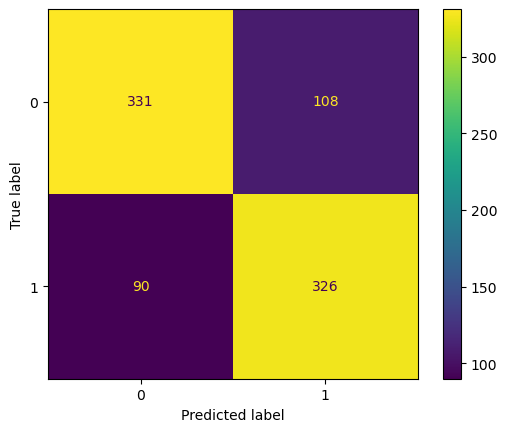

In [404]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [405]:
#classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n",classification_report(y_test,y_predict))

Accuracy: 0.7684210526315789
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       439
           1       0.75      0.78      0.77       416

    accuracy                           0.77       855
   macro avg       0.77      0.77      0.77       855
weighted avg       0.77      0.77      0.77       855



In [406]:
# we will improve it
# NOthing improved on changing the solve to sag -> newtonsag
# c value worked better at 0.01 in comparison to 1 & 0.001 : PRecision improved to 0.79
# maxiter kept at 200 and 2000 -> both gave same result, ALso same at 50
# not converges at 10
# also converges at 20
# could have used grid CV for this but wont have see

In [407]:
# Lets try Grid CV to find best hyperparams

In [408]:
param_grid= {
    'penalty' : ['l1','l2','elastinet','none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'C' : np.logspace(-4,4,20),
    'max_iter': [20,50,100,200,1000]
}

In [409]:
from sklearn.model_selection import GridSearchCV

In [410]:
X_train_scaled_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510
0,-0.063037,-0.445052,-0.541008,-0.520757,-1.013967,-1.095344,-1.014109,0.192559,0.985793,0.192419,-1.218148,2.011842,-1.216570,1.371647,1.780210,1.369559,0.107037,-0.994032,1.736112
1,-2.231058,-0.445052,-0.541008,-0.520757,-2.131803,0.968101,-2.131659,1.097438,-1.831055,1.098116,-0.904493,0.741455,-0.906801,0.521800,0.230254,0.517095,-0.522325,1.006004,-0.576000
2,-0.642857,2.246929,-0.541008,-0.520757,1.304863,-1.671188,1.304713,1.124450,1.036094,1.125355,-0.777391,-0.833825,-0.779249,0.557210,1.005232,0.556439,-0.522325,1.006004,-0.576000
3,1.197441,-0.445052,-0.541008,-0.520757,0.812312,-0.855408,0.812727,0.773303,-0.171127,0.773518,0.337826,-1.037087,0.336830,-0.150996,-0.544724,-0.151761,0.736399,1.006004,-0.576000
4,-0.920162,-0.445052,1.848402,2.092864,0.273383,0.872127,0.273707,-1.219748,0.281581,-1.219470,0.235324,-0.681379,0.236610,0.734261,-0.157235,0.740047,1.365761,1.006004,-0.576000


In [411]:
loggrid= GridSearchCV(model,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [412]:
best_model_log = loggrid.fit(X_train_scaled_df,y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


C:\Users\Om N. Gayamukhe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2700 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Om N. Gayamukhe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Om N. Gayamukhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Om N. Gayamukhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447

In [413]:
# so lot of combination were such that the params were not compatible with each other. Anyways

In [414]:
# Display the best estimator and its parameters
print("Best Estimator:", loggrid.best_estimator_)
print("Best Parameters:", loggrid.best_params_)


Best Estimator: LogisticRegression(C=0.012742749857031334, max_iter=20, penalty='none',
                   solver='sag')
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 20, 'penalty': 'none', 'solver': 'sag'}


In [415]:
# X_train_scaled.head()

In [416]:
# best_model = loggrid.best_estimator_   ->> penalty : none is giving problem to other params
best_model=LogisticRegression(C=0.012742749857031334, max_iter=20,solver='sag')
best_model.fit(X_train_scaled_df,y_train)
# y_pred_new = best_model.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred_new))
# print("Classification Report:\n", classification_report(y_test, y_pred_new))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))

LogisticRegression(C=0.012742749857031334, max_iter=20, solver='sag')

In [417]:
y_pred_new = best_model.predict(X_test_scaled_df)

In [418]:
y_pred_new.shape

(855,)

In [419]:
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("Classification Report:\n", classification_report(y_test, y_pred_new))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))

Accuracy: 0.7649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       439
           1       0.75      0.78      0.76       416

    accuracy                           0.76       855
   macro avg       0.77      0.77      0.76       855
weighted avg       0.77      0.76      0.76       855

Confusion Matrix:
 [[330 109]
 [ 92 324]]


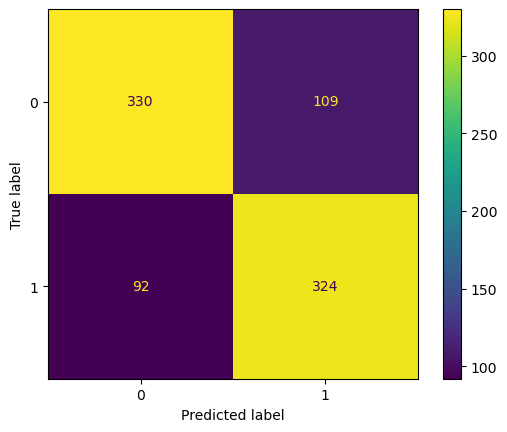

In [420]:
cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [421]:
# So after trying all the params combination the result is identical to the one performed intially :(

Model Evaluation on the Test data file

In [440]:
test_df = pd.read_csv('Telecom_Test.csv')

In [441]:
test_df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [442]:
# Preprocessing the test data
# Converting the test data format
#Encoding

# Encoding for categorical variables

# converting churn
# df['churn_val']= lambda(0 if x=='no' else 1  for x in df['churn'])
test_df['churn']= [0 if x=='no' else 1 for x in test_df['churn']]
test_df['international_plan']= [0 if x=='no' else 1 for x in test_df['international_plan']]
test_df['voice_mail_plan']= [0 if x=='no' else 1 for x in test_df['voice_mail_plan']]
# dont run it again in between, it can change values


# since customer are more driven by cost, we will drop the time columns
todrop= ['Unnamed: 0']
new_testdf= test_df.drop(columns=todrop,axis=1)

# hot encode area_code
new_testdf = pd.get_dummies(new_testdf, columns=['area_code'], drop_first=True)

# new_testdf.drop(['churn','state'],axis=1,inplace=True)

X_ttest= new_testdf.drop(['churn','state'],axis=1)
y_ttest =new_testdf['churn']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

scaler = StandardScaler()
X_ttest_scaled = scaler.fit_transform(X_ttest)
# X_test_scaled = scaler.transform(X_test)
# X_train_scaled.head()


X_ttest_scaled_df = pd.DataFrame(X_ttest_scaled, columns=X_ttest.columns)

# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# model.fit(X_train_scaled,y_train)
# in logistic regression it is advised to normalize data as one of the measure to avoid failing of convergence
# y_tpredict= best_model.predict(X_ttest_scaled_df)
# best_model.predict(X_test_scaled_df)

In [447]:
X_ttest_scaled_df.shape

(1667, 19)

In [448]:
X_test_scaled_df.shape

(855, 19)

In [449]:
final_predict= best_model.predict(X_ttest_scaled_df)

In [450]:
final_predict.shape

(1667,)

In [451]:
test_df.shape

(1667, 21)

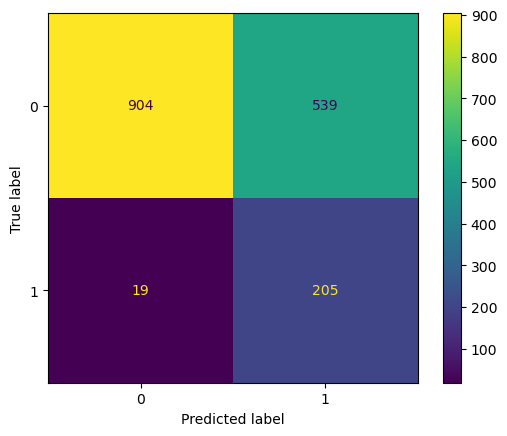

In [452]:
cmf = confusion_matrix(test_df['churn'], final_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cmf)
disp.plot()

In [455]:
print("Accuracy:", accuracy_score(test_df['churn'] , final_predict))
print("Classification Report:\n", classification_report(test_df['churn'], final_predict))
print("Confusion Matrix:\n", confusion_matrix(test_df['churn'], final_predict))

Accuracy: 0.6652669466106779
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.63      0.76      1443
           1       0.28      0.92      0.42       224

    accuracy                           0.67      1667
   macro avg       0.63      0.77      0.59      1667
weighted avg       0.88      0.67      0.72      1667

Confusion Matrix:
 [[904 539]
 [ 19 205]]


## Remarks:
1. In evaluation of model using final test dataset we got accuracy of 66.5%. This is worse than the model training evaluation.

2. From the confusion matrix we see that TP( ie Actual label =0 & Predicted label=0) works very well with precision of 0.98. But FP is very high which is concerning. This showcases the fact though we upscaled the data since we had very less points for label=1, the model doesnt performs well since there are not many actual data points for class label=1. This highlights the problem faced due to imbalanced dataset. 

3. Maybe downscaling should also be tried. But it raises more problem since the new training dataset formed will be very more and won't train our model properly

# -- THE END--